In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/DVA 6242 Team Project/Datasets

/content/drive/MyDrive/DVA 6242 Team Project/Datasets


In [ ]:
import numpy as np
import pandas as pd

**Load data from datasets.**

In [ ]:
all_trees_df = pd.read_csv('ALL_TREE_DATASETS.csv')

<ipython-input-4-ffe0f97a6ef2>:1: DtypeWarning: Columns (0,1,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  all_trees_df = pd.read_csv('ALL_TREE_DATASETS.csv')


In [ ]:
all_trees_df

,most_recent_observation,common_name,scientific_name,city,longitude_coordinate,latitude_coordinate,condition,height_M,native,height_binned_M,diameter_breast_height_binned_CM,greater_metro,diameter_breast_height_CM,column_name,definition
0,6/17/2020,Locust,NaN,Albuquerque,-106.568366,35.060456,dead/dying,NaN,no_info,NaN,NaN,Albuquerque,NaN,NaN,NaN
1,6/3/2020,Ash,Fraxinus,Albuquerque,-106.581127,35.052176,dead/dying,NaN,no_info,NaN,NaN,Albuquerque,NaN,NaN,NaN
2,6/3/2020,Scotch pine,Pinus sylvestris,Albuquerque,-106.575056,35.052450,dead/dying,147.6378,introduced,more than 18.29 m,NaN,Albuquerque,NaN,NaN,NaN
3,5/29/2020,Honeylocust,Gleditsia triacanthos,Albuquerque,-106.716539,35.149632,good,98.4252,introduced,more than 18.29 m,NaN,Albuquerque,NaN,NaN,NaN
4,5/29/2020,Honeylocust,Gleditsia triacanthos,Albuquerque,-106.716640,35.149744,good,114.8294,introduced,more than 18.29 m,NaN,Albuquerque,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2621732,08/07/2020,Redmond american linden,Tilia americana,Washington DC,-77.077089,38.960497,good,NaN,naturally_occurring,NaN,0 to 15.24 cm,WashingtonDC,3.810,NaN,NaN
2621733,08/07/2020,Dogwood,Cornus,Washington DC,-77.073341,38.969721,fair,NaN,no_info,NaN,0 to 15.24 cm,WashingtonDC,3.302,NaN,NaN
2621734,08/07/2020,Flowering dogwood,Cornus florida,Washington DC,-77.070964,38.961437,fair,NaN,naturally_occurring,NaN,0 to 15.24 cm,WashingtonDC,4.826,NaN,NaN
2621735,08/07/2020,(see notes),NaN,Washington DC,-77.011924,38.915656,good,NaN,no_info,NaN,NaN,WashingtonDC,NaN,NaN,NaN


**Get the names of all the cities in all_trees_df**

In [ ]:
cities = all_trees_df["city"].unique()

In [ ]:
cities

array(['Albuquerque', 'Aurora', 'Boston', 'Austin', 'Cape Coral',
       'Columbus', 'Durham', 'De Soto', 'Newton', 'Baxter', 'Dexter',
       'Van Meter', 'Bayard', 'Earlham', 'Mitchellville', 'Panora',
       'Stuart', 'Milo', 'Adair', 'Hartford', 'Carlisle', 'Monroe',
       'Prairie City', 'Colfax', 'Dallas Center', 'Guthrie Center',
       'Polk City', 'Waukee', 'Runnells', 'Elkhart', 'Granger',
       'Pleasant Hill', 'Oakland Acres', 'Kellogg', 'Woodward', 'Bouton',
       'Union', 'Des Moines', 'Redfield', 'Windsor Heights', 'Sully',
       'Adel', 'Bondurant', 'Coon Rapids', 'Kailua', 'Kaneohe',
       'Honolulu', nan, 'Waipahu', 'Ahuimanu', 'Heeia', 'Greensboro',
       'Las Vegas', 'Los Angeles', 'Knoxville', 'Louisville',
       'Minneapolis', 'Miami', 'New York', 'Overland Park', 'Plano',
       'Pittsburgh', 'Rancho Cucamonga', 'Portland', 'Richmond',
       'San Jose', 'Seattle', 'St. Louis', 'Sioux Falls', 'Washington DC'],
      dtype=object)

In [ ]:
# Focus on major, well-known US cities.
cities = ['Albuquerque', 'Boston', 'Austin',
       'Columbus', 'Honolulu', 'Greensboro',
       'Las Vegas', 'Los Angeles', 'Knoxville', 'Louisville',
       'Minneapolis', 'Miami', 'New York',
       'Pittsburgh', 'Portland', 'Richmond',
       'San Jose', 'Seattle', 'St. Louis', 'Sioux Falls', 'Washington DC']

In [ ]:
all_trees_df_cities_of_interest = all_trees_df[all_trees_df['city'].isin(cities)]

**Visualize aggregate tree condition statistics by city.**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Remove rows where tree condition is empty
all_trees_df_cities_of_interest = all_trees_df_cities_of_interest[all_trees_df_cities_of_interest['condition'] != ' ']

In [ ]:
# Count the number of trees of each condition in each city
tree_condition_counts = all_trees_df_cities_of_interest.groupby(['city', 'condition']).size().reset_index(name='count')

In [ ]:
# Calculate the total number of trees in each city
city_totals = tree_condition_counts.groupby('city')['count'].transform('sum')

In [ ]:
# Compute proportions
tree_condition_counts['proportion'] = tree_condition_counts['count'] / city_totals

In [ ]:
# Convert condition to a categorical variable with the defined order
condition_order = ["dead", "dead/dying", "poor", "fair", "good", "excellent"]
tree_condition_counts['condition'] = pd.Categorical(tree_condition_counts['condition'], categories=condition_order, ordered=True)
tree_condition_counts = tree_condition_counts.sort_values(by='condition')
# Define the palette's color scheme
colors = sns.color_palette("RdYlGn", n_colors=len(condition_order))
condition_color_mapping = dict(zip(condition_order, colors)) # mapping from condition (in condition_order) to color

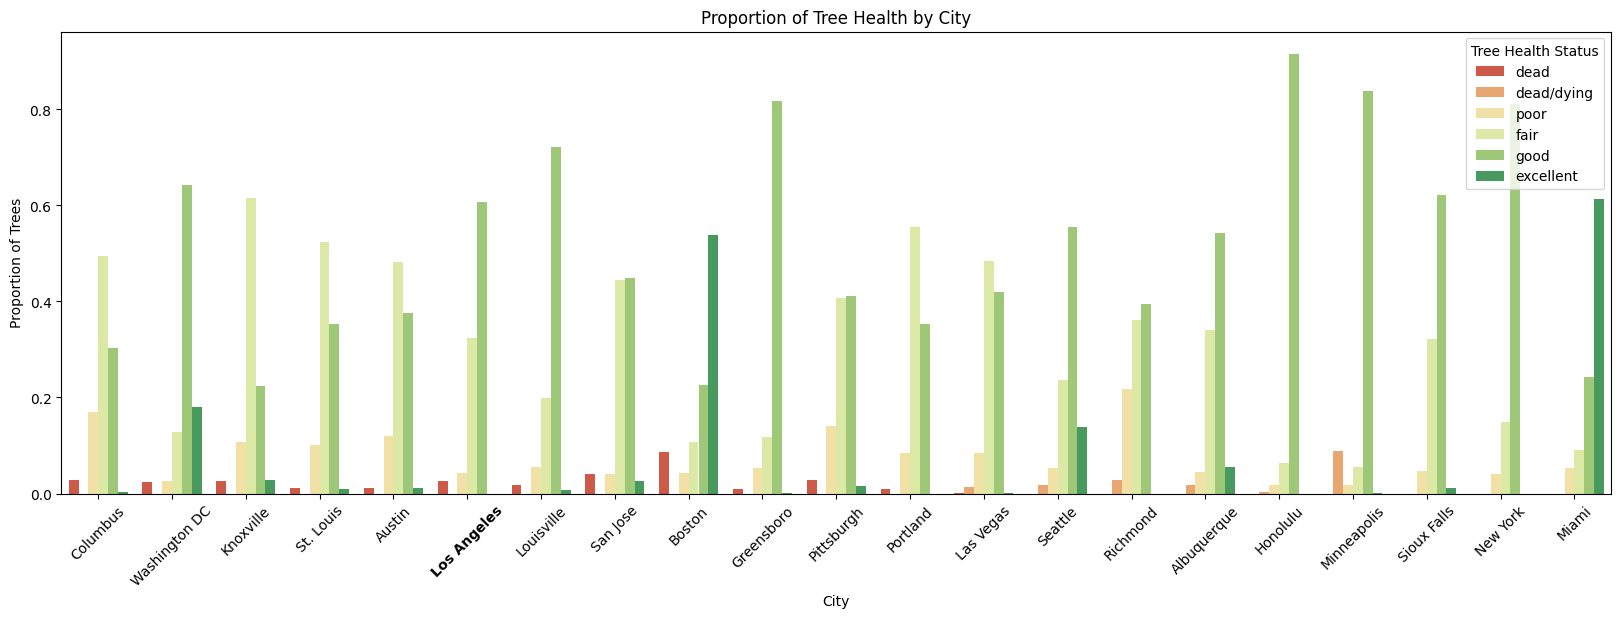

In [ ]:
plt.figure(figsize=(20, 6))
ax = sns.barplot(data=tree_condition_counts, x='city', y='proportion', hue='condition', hue_order=condition_order, palette=condition_color_mapping)

# Set Los Angeles font to bold
for label in ax.get_xticklabels():
    if label.get_text() == "Los Angeles":
        label.set_fontweight('bold')

plt.xlabel('City')
plt.ylabel('Proportion of Trees')
plt.title('Proportion of Tree Health by City')
plt.xticks(rotation=45)
plt.legend(title="Tree Health Status")
plt.show()